## HW6

5 questions that I could answer with my data:
- Which genre has the highest worldwide_gross?
- Which genre has the highest domestic_gross?
- Is there any relationship between production_budget and domestic_gross?
- Is there any relationship between production_budget and worldwide_gross?
- Which mpaa_rating has the highest production_budget?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

In [2]:
movies = pd.read_csv("movies.csv")
movies

,...1,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy
1,2,7/28/1995,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000,39175066,139950708,Warner Bros.,PG-13,Adventure
3,4,12/25/2013,47 Ronin,175000000,38362475,151716815,Universal,PG-13,Action
4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000,416769345,1304866322,Universal,PG-13,Action
...,...,...,...,...,...,...,...,...,...
3396,3397,10/28/2011,Like Crazy,250000,3395391,3728400,Paramount Pictures,PG-13,Drama
3397,3398,7/14/2000,Chuck&Buck,250000,1055671,1157672,Artisan,R,Drama
3398,3399,3/28/1997,Love and Other Catastrophes,250000,212285,743216,Fox Searchlight,R,Comedy
3399,3400,8/28/1998,I Married a Strange Person,250000,203134,203134,Lionsgate,NaN,Comedy


In [3]:
movies['release_date'] = movies['release_date'].apply(lambda _: datetime.strptime(_,"%m/%d/%Y"))

In [4]:
movies.describe(include="all")

/var/folders/hh/xjdg_tdx6nqc_tyw1dv8dk880000gn/T/ipykernel_4231/3579614445.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  movies.describe(include="all")


,...1,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
count,3401.00000,3401,3401,3.401000e+03,3.401000e+03,3.401000e+03,3353,3264,3401
unique,NaN,1768,3400,NaN,NaN,NaN,201,4,5
top,NaN,2000-12-22 00:00:00,Tau ming chong,NaN,NaN,NaN,Warner Bros.,R,Drama
freq,NaN,8,2,NaN,NaN,NaN,374,1514,1236
first,NaN,1936-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-03-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1701.00000,NaN,NaN,3.328474e+07,4.542179e+07,9.411512e+07,NaN,NaN,NaN
std,981.92846,NaN,NaN,3.489239e+07,5.882566e+07,1.409182e+08,NaN,NaN,NaN
min,1.00000,NaN,NaN,2.500000e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,851.00000,NaN,NaN,9.000000e+06,6.118683e+06,1.061881e+07,NaN,NaN,NaN


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ...1               3401 non-null   int64         
 1   release_date       3401 non-null   datetime64[ns]
 2   movie              3401 non-null   object        
 3   production_budget  3401 non-null   int64         
 4   domestic_gross     3401 non-null   int64         
 5   worldwide_gross    3401 non-null   int64         
 6   distributor        3353 non-null   object        
 7   mpaa_rating        3264 non-null   object        
 8   genre              3401 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 239.3+ KB


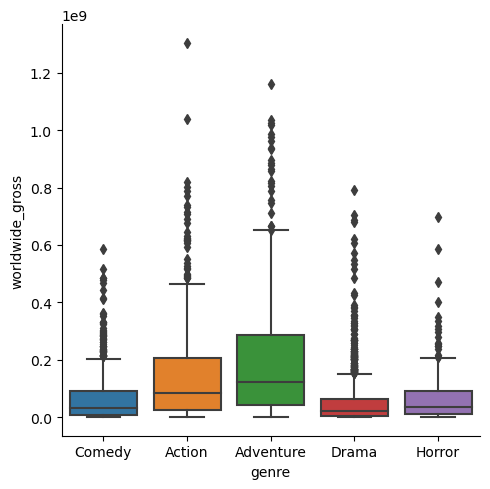

In [6]:
sns.catplot(data=movies, x="genre", y="worldwide_gross", kind = "box")
plt.show()

Interpretation: This boxplot is to answer to my first question. The mean in worldwide_gross of Adventure genre is the highest, while the mean in worldwide_gross of Drama genre is the lowest.

In [7]:
movies.value_counts("genre")

genre
Drama        1236
Comedy        813
Action        573
Adventure     481
Horror        298
dtype: int64

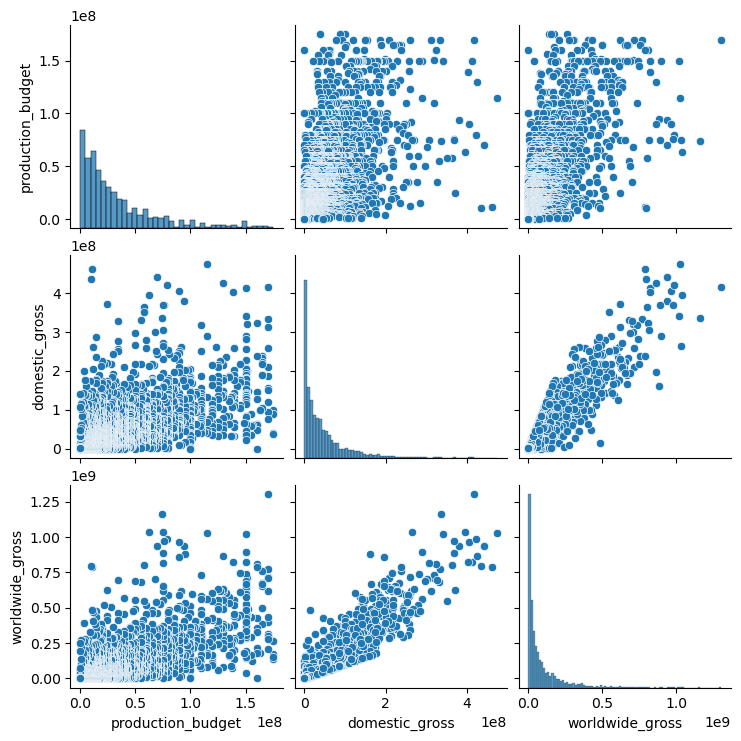

In [8]:
sns.pairplot(data=movies.iloc[:, 1:])
plt.show()

There are some outliers in worldwide_gross. Particularly, outliers is values > 1,000,000,000

In [9]:
movies[movies["worldwide_gross"] < 1000000000]

,...1,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,2007-06-22,Evan Almighty,175000000,100289690,174131329,Universal,PG,Comedy
1,2,1995-07-28,Waterworld,175000000,88246220,264246220,Universal,PG-13,Action
2,3,2017-05-12,King Arthur: Legend of the Sword,175000000,39175066,139950708,Warner Bros.,PG-13,Adventure
3,4,2013-12-25,47 Ronin,175000000,38362475,151716815,Universal,PG-13,Action
5,6,2014-08-01,Guardians of the Galaxy,170000000,333172112,771051335,Walt Disney,PG-13,Action
...,...,...,...,...,...,...,...,...,...
3396,3397,2011-10-28,Like Crazy,250000,3395391,3728400,Paramount Pictures,PG-13,Drama
3397,3398,2000-07-14,Chuck&Buck,250000,1055671,1157672,Artisan,R,Drama
3398,3399,1997-03-28,Love and Other Catastrophes,250000,212285,743216,Fox Searchlight,R,Comedy
3399,3400,1998-08-28,I Married a Strange Person,250000,203134,203134,Lionsgate,NaN,Comedy


## HW7

In [10]:
from scipy import stats
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

### T-Test

In [11]:
adventure = movies[movies["genre"] == "Adventure"]
action = movies[movies["genre"] == "Action"]
stats.ttest_ind(adventure["domestic_gross"], action["domestic_gross"]) 

Ttest_indResult(statistic=5.0646886962042075, pvalue=4.828056270048541e-07)

Interpretation: Since p-value is very small, we can reject the null hypothesis. This means that there is a true different in mean of domestic_gross between Adventure and Action genres. In particular, the mean of domestic_gross of Adventure movies is appromizately 5.065 higher than Action movies.

### Linear Regression

In [12]:
stats.linregress(x = movies["production_budget"], y = movies["domestic_gross"])

LinregressResult(slope=0.966989248196515, intercept=13235804.616578747, rvalue=0.5735688511582805, pvalue=8.183883949809136e-297, stderr=0.023687969772213, intercept_stderr=1142191.329277245)

Interpretation: Since pvalue is very small, we can reject the null hypothesis. The rvalue (correlation coefficient) is around 0.574, so there is a moderate positive correlation between production_budget and domestic_gross. 

Linear regression equation: 
worldwide_gross = 0.967 * production_budget + 13235804.62

### Prediction

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(movies.loc[:, ["domestic_gross","worldwide_gross"]], movies[["production_budget"]], random_state=111)

In [14]:
# Use LinearRegression based on training data
reg = linear_model.LinearRegression().fit(X_train, y_train)

In [15]:
reg.score(X_train, y_train)

0.4464930930972776

In [16]:
reg.score(X_test, y_test)

0.40890265488019173

In [17]:
pd.DataFrame({"column" : X_test.columns, "coefficient" : reg.coef_[0]}).sort_values("coefficient")

,column,coefficient
0,domestic_gross,-0.147598
1,worldwide_gross,0.222959


worldwide_gross has bigger effect on the prediction for production_budget than domestic_gross. However, it is still a very weak correlation between worldwide_gross and production_budget.


I do not highly recommend this model for future prediction. Although we can see that domestic_gross and worldwide_gross have respectively negative and positive correlation with production_budget. These correlations are both very weak. The accuracy scores of the prediction on both training and test set are also low, which means that the predicted values may not be closed enough to the actual values.

## Additional Requirements

### Plot for question 4

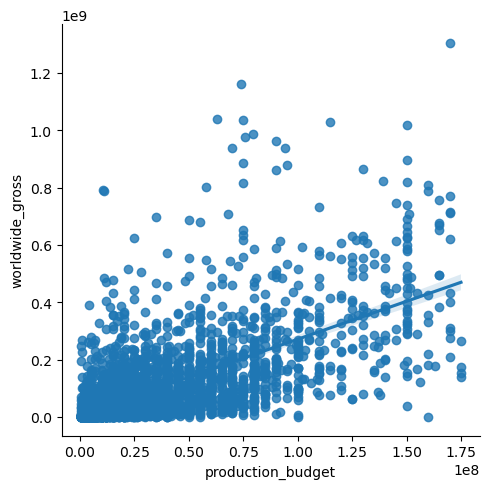

In [18]:
sns.lmplot(data=movies, x="production_budget", y="worldwide_gross")
plt.show()

Based on the plot, we can see a positive correlation between production_budget and worldwide_gross

### Logistic Regression

I would like to do this model on 2 groups of movies: either released after 2000 or not

In [19]:
movies['after2000'] = movies['release_date'] >= datetime.strptime('20000101', '%Y%m%d')

In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(movies.loc[:, ["production_budget", "domestic_gross", "worldwide_gross"]], movies[["after2000"]], random_state=123)

In [21]:
reg = linear_model.LogisticRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7345098039215686

In [22]:
reg.score(X_test, y_test)

0.72737955346651

In [23]:
y_pred = reg.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[ 31, 204],
       [ 28, 588]])

In [24]:
y_pred = reg.predict(X_train)
metrics.confusion_matrix(y_train, y_pred)

array([[ 110,  588],
       [  89, 1763]])

In [25]:
pd.DataFrame({"column" : X_test.columns, "coefficient" : reg.coef_[0]}).sort_values("coefficient")

,column,coefficient
1,domestic_gross,-7.857988e-09
2,worldwide_gross,2.015665e-09
0,production_budget,2.631677e-08


The variable that has the biggest effect on the prediction is production_budget

### Conclusion
1. Adventure genre has the highest worldwide gross and outperforms Action genre in domestic gross.
1. Production budget has moderate positive correlation with both worldwide and domestic gross. However, it may not be appropriate to predict the production budget based on the two gross variables using Linear Regression model since the accuracy scores are not high enough for both training and test sets.
3. The accuracy scores resulted by Logistic Regression model are high enough to suggest predicting whether a movie is released after 2000 based on production budget, domestic gross and worldwidegross. Specially, production budget has the biggest effect on the prediction.

### Third statistical test (T-Test)

In [26]:
r = movies[movies["mpaa_rating"] == "R"]
pg_13 = movies[movies["mpaa_rating"] == "PG-13"]
stats.ttest_ind(r["production_budget"], pg_13["production_budget"]) 

Ttest_indResult(statistic=-14.87698247873508, pvalue=4.156421056674725e-48)

Interpretation: Since p-value is very small, we can reject the null hypothesis. This means that there is a true different in mean of production_budget between R and PG-13 mpaa rating. In particular, the mean of production budget of R movies is nearly 14.88 lower than PG-13 movies.